In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

from NFW_Z import NFW_Z

%matplotlib inline

In [2]:
dm_300 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/RT/dwarf_dm_5e8_rt_0300.txt")

dx_dm_300 = dm_300[:,4] / 1000 # converting pc to kpc
dy_dm_300 = dm_300[:,5] / 1000 # converting pc to kpc
dz_dm_300 = dm_300[:,6] / 1000 # converting pc to kpc
r_dm_300 = np.sqrt(dx_dm_300**2 + dy_dm_300**2 + dz_dm_300**2)
print(max(r_dm_300))

vx_dm_300 = dm_300[:,7]
vy_dm_300 = dm_300[:,8]
vz_dm_300 = dm_300[:,9]
vx_dm_COM = np.sum(vx_dm_300) / np.size(vx_dm_300)
vy_dm_COM = np.sum(vy_dm_300) / np.size(vy_dm_300)
vz_dm_COM = np.sum(vz_dm_300) / np.size(vz_dm_300)
vx_dm_new = vx_dm_300 - vx_dm_COM
vy_dm_new = vy_dm_300 - vy_dm_COM
vz_dm_new = vz_dm_300 - vz_dm_COM
v_dm_new = np.sqrt(vx_dm_new**2 + vy_dm_new**2 + vz_dm_new**2)

11.700723282344557


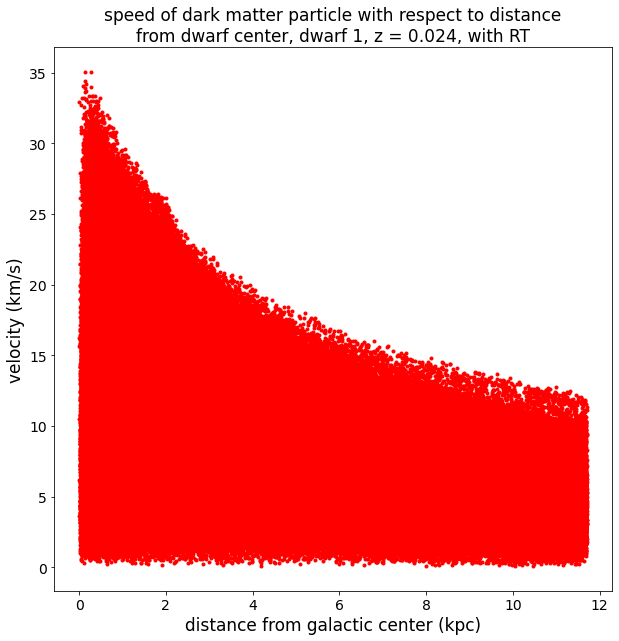

In [3]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(r_dm_300, v_dm_new, '.', color='red')

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.title('speed of dark matter particle with respect to distance\nfrom dwarf center, dwarf 1, z = 0.024, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [4]:
star_300 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/RT/dwarf_star_5e8_rt_0300.txt")

dx_star_300 = star_300[:,4] / 1000 # converting pc to kpc
dy_star_300 = star_300[:,5] / 1000 # converting pc to kpc
dz_star_300 = star_300[:,6] / 1000 # converting pc to kpc
r_star_300 = np.sqrt(dx_star_300**2 + dy_star_300**2 + dz_star_300**2)

vx_star_300 = star_300[:,7]
vy_star_300 = star_300[:,8]
vz_star_300 = star_300[:,9]
vx_star_COM = np.sum(vx_star_300) / np.size(vx_star_300)
vy_star_COM = np.sum(vy_star_300) / np.size(vy_star_300)
vz_star_COM = np.sum(vz_star_300) / np.size(vz_star_300)
vx_star_new = vx_star_300 - vx_star_COM
vy_star_new = vy_star_300 - vy_star_COM
vz_star_new = vz_star_300 - vz_star_COM
v_star_new = np.sqrt(vx_star_new**2 + vy_star_new**2 + vz_star_new**2)

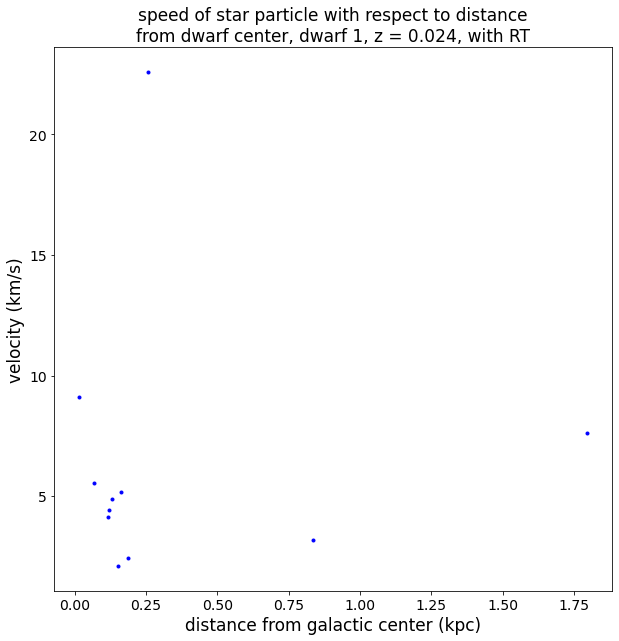

In [5]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(r_star_300, v_star_new, '.', color='blue')

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.title('speed of star particle with respect to distance\nfrom dwarf center, dwarf 1, z = 0.024, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [19]:
NFW_1A = NFW_Z(3.13e8, 'Jeon')
r_s = NFW_1A.r_s(0.024, 30)
sample_array = np.arange(0.01, 11.7, 0.02) #unit: kpc

v_esc_1A = NFW_1A.v_esc(sample_array, 0.024, 30)

In [20]:
NFW_1B = NFW_Z(7.13e8, 'Jeon')
r_s = NFW_1B.r_s(0.024, 21)
sample_array = np.arange(0.01, 11.7, 0.02) #unit: kpc

v_esc_1B = NFW_1B.v_esc(sample_array, 0.024, 21)

In [35]:
NFW_1C = NFW_Z(1.11e9, 'Jeon')
r_s = NFW_1C.r_s(0.024, 19)
sample_array = np.arange(0.01, 11.7, 0.02) #unit: kpc

v_esc_1C = NFW_1C.v_esc(sample_array, 0.024, 19)

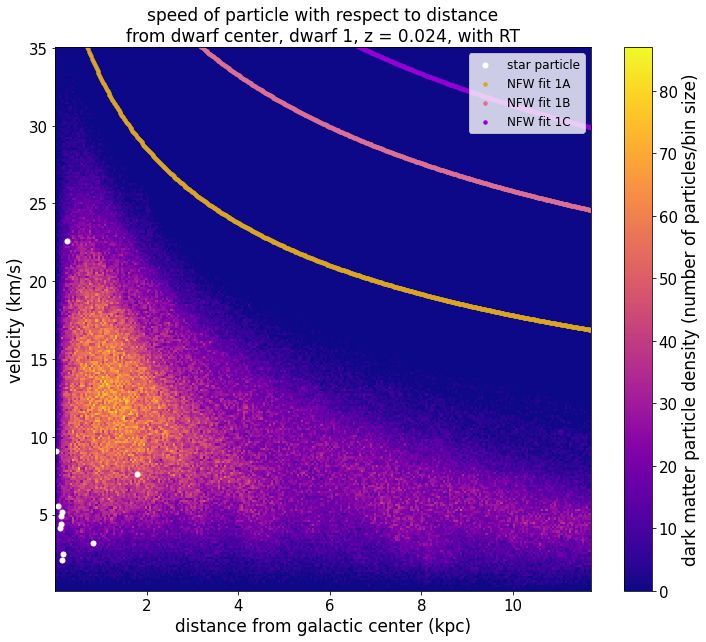

In [36]:
fig, ax = plt.subplots(figsize=[12, 10])

plt.hist2d(r_dm_300, v_dm_new, bins=250, cmap='plasma')
cbar = plt.colorbar()
cbar.set_label(label='dark matter particle density (number of particles/bin size)', size=17)
cbar.ax.tick_params(labelsize=15)

plt.scatter(r_star_300, v_star_new, 25, color='white', label='star particle')
plt.scatter(sample_array, v_esc_1A, 12, color='goldenrod', label='NFW fit 1A')
plt.scatter(sample_array, v_esc_1B, 12, color='palevioletred', label='NFW fit 1B')
plt.scatter(sample_array, v_esc_1C, 12, color='darkviolet', label='NFW fit 1C')

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.title('speed of particle with respect to distance\nfrom dwarf center, dwarf 1, z = 0.024, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=12)

plt.show()